### Samantha Bracellari
#### CSI 5810 Homework 1

#### Problem 1 - Census Income Data Set

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# read from the csv into DataFrame
data = pd.read_csv('adult.csv')

X = data.shape
Y = list(data.columns)

In [3]:
print('Size:', X)
print('\nFeatures:', Y)

Size: (32561, 15)

Features: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'prediction']


In [4]:
# descriptive statistics of applicable columns
print('\n', data.describe())


                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


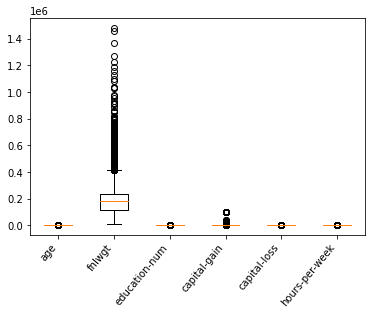

In [5]:
# filter out non-number columns
plot_data = [data['age'], data['fnlwgt'], data['education-num'], data['capital-gain'], data['capital-loss'], data['hours-per-week']]
headings = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# boxplots of applicable columns
plt.boxplot(plot_data)
plt.xticks(np.arange(1, 7), headings, rotation=50, ha='right')
plt.show()

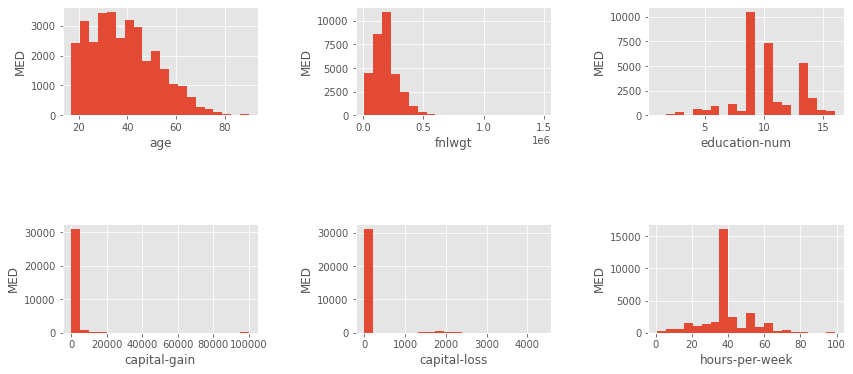

In [6]:
# histograms of applicable columns
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 3, figsize=(14, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.hist(plot_data[i-1], bins=20)
    plt.xlabel(headings[i-1])
    plt.ylabel('MED')
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

-----

#### Problem 2 - Euclidean and Mahalanobis Distances

In [8]:
# import libs
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

# define mean and cov as given
mean = [1, 2, 1]
cov = [[5, 0.8, -0.3], [0.8, 3, 0.6], [-0.3, 0.6, 4]]

# generate random vectors
x1, x2, x3 = np.random.multivariate_normal(mean, cov, 100).T

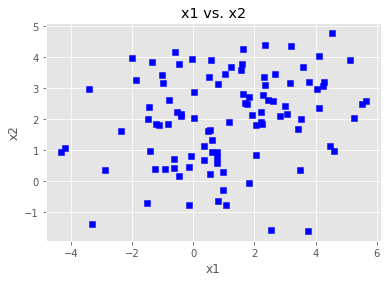

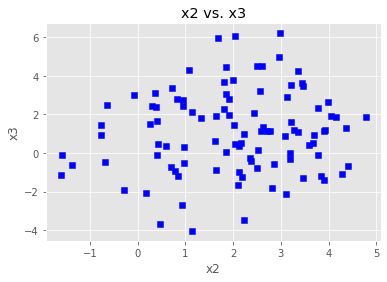

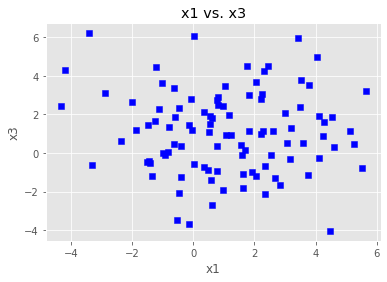

In [9]:
# generate scatter plots of each x pair
plt.scatter(x1, x2, color='blue', marker='s')
plt.title('x1 vs. x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.scatter(x2, x3, color='blue', marker='s')
plt.title('x2 vs. x3')
plt.xlabel('x2')
plt.ylabel('x3')
plt.show()

plt.scatter(x1, x3, color='blue', marker='s')
plt.title('x1 vs. x3')
plt.xlabel('x1')
plt.ylabel('x3')
plt.show()


In [10]:
# calculate euclidean and mahalanobis distances for 5 random pairs
for i in range(5):
    n1, n2 = np.random.randint(1, 100), np.random.randint(1, 100)
    d1, d2 = [x1[n1], x2[n1], x3[n1]], [x1[n2], x2[n2], x3[n2]]

    print('\nEuclidian Distance', i+1, '=', distance.euclidean(d1, d2))
    print('Mahalanobis Distance', i+1, '=', distance.mahalanobis(d1, d2, cov))


Euclidian Distance 1 = 4.034905015264733
Mahalanobis Distance 1 = 9.103635501086119

Euclidian Distance 2 = 1.4376824005390918
Mahalanobis Distance 2 = 2.9376079746907404

Euclidian Distance 3 = 4.415465817448314
Mahalanobis Distance 3 = 8.787051954981662

Euclidian Distance 4 = 3.992069938257518
Mahalanobis Distance 4 = 8.599685854445953

Euclidian Distance 5 = 4.4861939140033105
Mahalanobis Distance 5 = 8.51069477242108


-----

#### Problem 3 - IPUMS USA Data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv into DataFrame object
data = pd.read_csv('ipums.csv')

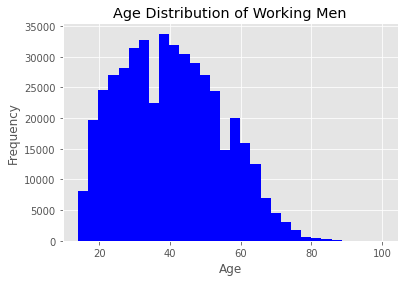

In [15]:
# age distribution of working men
male_data = data.query('SEX == 1 and EMPSTAT == 1') # employed males

plt.hist(male_data['AGE'], bins=30, color='b')
plt.title('Age Distribution of Working Men')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

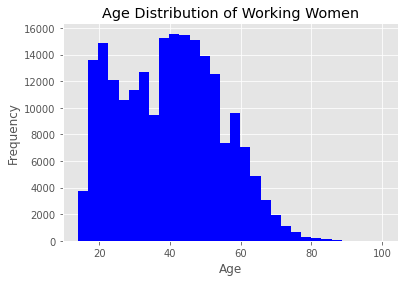

In [16]:
# age distribution of working women
female_data = data.query('SEX == 2 and EMPSTAT == 1') # employed females

plt.hist(female_data['AGE'], bins=30, color='b')
plt.title('Age Distribution of Working Women')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
# percent of households headed by women 
single_females = data.query('SEX == 2 and (MARST == 3 or MARST == 4 or MARST == 5 or MARST == 6)') # number of single/not married females
num = single_females.size
total = data.size

percent = (num/total)*100

print('\nPercent of households headed by women:', percent)


Percent of households headed by women: 27.70544611664726


-----

#### Problem 4 - Web Scraping

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

page = requests.get('https://iksinc.online/list-of-blog-posts')
soup = BeautifulSoup(page.content, 'html')

# initialize DataFrame
df = pd.DataFrame({'Title': [], 'URL': []})
for i in range(3, 44):
    post = soup.find_all('p')[i]
    df = df.append({'Title': post.text, 'URL': post.a['href']}, ignore_index=True)

df.head(10)

,Title,URL
0,Understanding Compression of Convolutional Neu...,https://iksinc.wordpress.com/2020/06/09/unders...
1,Understanding Compression of Convolutional Neu...,https://iksinc.wordpress.com/2020/06/04/unders...
2,Understanding Compression of Convolutional Neu...,https://iksinc.wordpress.com/2020/06/02/unders...
3,Groups Parameter of the Convolution Layer,https://iksinc.wordpress.com/2020/05/10/groups...
4,Convolution and Deconvolution Revisited,https://iksinc.online/2020/03/09/convolution-a...
5,Numeric Representation of Text: CountVectorize...,https://iksinc.online/2019/12/21/numeric-repre...
6,Semi-Supervised Clustering with K-means,https://iksinc.online/2019/05/14/semi-supervis...
7,How Similar are Two Clustering Results,https://iksinc.online/2019/05/06/how-similar-a...
8,How to Build a Labelled Training Data Set with...,https://iksinc.online/2019/03/27/how-to-build-...
9,How to Perform Regression with more Predictors...,https://iksinc.online/2019/01/07/how-to-perfor...


-----

#### Problem 5 - Principal Component Analysis

In [18]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import preprocessing

X = np.array([
    [5700, 12.8, 2500, 270, 25000],
    [1000, 10.9, 600, 10, 10000],
    [3400, 8.8, 1000, 10, 9000],
    [3800, 13.6, 1700, 140, 25000],
    [4000, 12.8, 1600, 140, 25000],
    [8200, 8.3, 2600, 60, 12000],
    [1200, 11.4, 400, 10, 16000],
    [9100, 11.5, 3300, 60, 14000],
    [9900, 12.5, 3400, 180, 18000],
    [9600, 9.6, 3300, 80, 12000],
    [9400, 11.4, 4000, 100, 13000]
])

In [19]:
# normalize X
X = preprocessing.normalize(X, norm='l2')

# calculate mean and covariance
mean = np.mean(X, 0)
cov = np.cov(X.T)

# obtain eigenvalues and eigenvectors
w, v = LA.eig(cov)

print('\nEigenvalues:\n', w)
print('\nEigenvectors:\n', v)


Eigenvalues:
 [5.71804385e-02 3.61970257e-04 1.88668139e-04 6.04392032e-06
 9.85939744e-09]

Eigenvectors:
 [[ 8.76099278e-01 -4.70510476e-01  1.04664315e-01  1.07388967e-02
   6.85348226e-05]
 [-1.45755997e-04  6.76781680e-04 -1.13866295e-03  5.90118627e-02
  -9.98256392e-01]
 [ 2.95232224e-01  6.95955062e-01  6.47527436e-01  9.57292641e-02
   5.34915128e-03]
 [ 3.02951248e-03  1.24196533e-02  1.32029740e-01 -9.89427584e-01
  -5.86325705e-02]
 [-3.81154548e-01 -5.42320697e-01  7.43182650e-01  9.09463596e-02
   4.21655440e-03]]



Visualization of transformed data


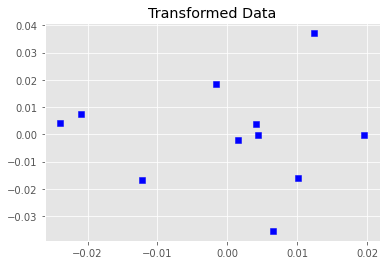

In [21]:
# form transformation matrix
M = np.array([v[:, 2], v[:, 1]])

# transform data to 2D
M_transform = np.matmul(M, (X - mean).T)

# visualization of the transformed data
print('\nVisualization of transformed data')

plt.scatter(M_transform[0], M_transform[1], color='blue', marker='s')
plt.title('Transformed Data')
plt.show()

In [22]:
# recover original data
X_original = np.matmul(M.T, M_transform).T + mean

# calculate mean squared error
mse = np.sum((X - X_original)**2)/10
print('\n Reconstruction error:', mse)


 Reconstruction error: 0.057186492326679196


-----

#### Problem 6 - PCA against Breast Cancer Dataset

In [23]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
from sklearn import preprocessing

# read from the csv, returns a DataFrame object
X = pd.read_csv('breast-cancer-wisconsin.csv')

# store class column for use in graphs
class_col = X[X.columns[-1]].to_numpy()

In [24]:
# normalize X
X = preprocessing.normalize(X.values, norm='l2')

# calculate mean and covariance
mean = np.mean(X, 0)
cov = np.cov(X.T)

# obtain eigenvalues and eigenvectors
w, v = LA.eig(cov)

print('\nEigenvalues:\n', w)


Eigenvalues:
 [0.04801801 0.0318127  0.00157326 0.00427429 0.00742009 0.00575582
 0.01193894 0.01339028 0.01711382 0.01959288]



Visualization of transformed data


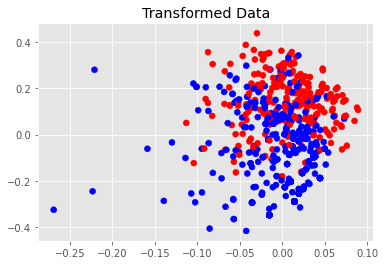

In [25]:
# form transformation matrix
M = np.array([v[:, 2], v[:, 1]])

# transform data to 2D
M_transform = np.matmul(M, (X - mean).T)

# visualization of the transformed data
print('\nVisualization of transformed data')

colors = np.where(class_col == 2, 'blue', 'red') # define color rule in graph

plt.scatter(M_transform[0], M_transform[1], color=colors)
plt.title('Transformed Data')
plt.show()

-----

#### Problem 7 - t-SNE Visualization on Breast Cancer Dataset

In [26]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE

# read from the csv, returns a DataFrame object
X = pd.read_csv('breast-cancer-wisconsin.csv')

# store class column for use in graphs
class_col = X[X.columns[-1]].to_numpy()
colors = np.where(class_col == 2, 'blue', 'red') # define color rule in graph

X = X.values # numpy array

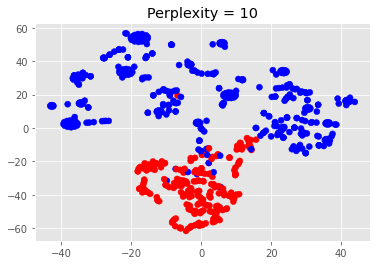

In [27]:
# perform t-SNE with 2 dimensions and perplexity value 10
X10 = TSNE(n_components=2, perplexity=10).fit_transform(X)
X10_df = pd.DataFrame(data=X10) # back to data frame


plt.scatter(X10_df[0], X10_df[1], color=colors)
plt.title('Perplexity = 10')
plt.show()

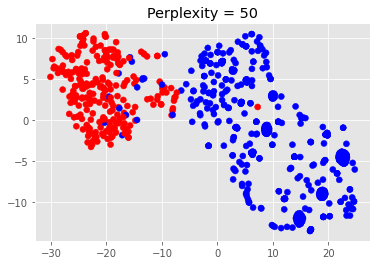

In [28]:
# perform t-SNE with 2 dimensions and perplexity value 50
X50 = TSNE(n_components=2, perplexity=50).fit_transform(X)
X50_df = pd.DataFrame(data=X50) # back to data frame

plt.scatter(X50_df[0], X50_df[1], color=colors)
plt.title('Perplexity = 50')
plt.show()